In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:

class Perseptron:
    def __init__(self, n_iter = 50):
        self.n_iter = n_iter
        self.activation_f = self.step_func
        self.weights = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.random.rand(n_features, y.shape[1])
        self.b = np.random.uniform(-5, 5, y.shape[1])
        
        print("start weights ", self.weights)
        print("start biase ", self.b)
        
        for _ in range(self.n_iter):
            for i, x_i in enumerate(X):
                n = np.dot(x_i, self.weights) + self.b
                predicted_y = self.activation_f(n)
                update = y[i] - predicted_y
                self.weights += update.reshape(-1,1) * x_i.reshape(-1,1)
                self.b += update
                
            print("---------------")
            print("epoch", _)
            print("weights ", self.weights)
            print("biase ", self.b)
            print("mae", np.average(abs(y - self.predict(X))))
            print("---------------")
                
    def predict(self, X):
        n = np.dot(X, self.weights) + self.b
        predicted_y = self.activation_f(n)
        return predicted_y
        
    def step_func(self, n):
        return np.where(n>=0, 1, 0)
        

In [3]:
def ploter(X, Y, p):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker = 'o', c=Y)

    x_1 = np.amin(X[:,0])
    x_2 = np.amax(X[:,0])

    x1_1 = (-p.weights[0] * x_1 - p.b) / p.weights[1]
    x1_2 = (-p.weights[0] * x_2 - p.b) / p.weights[1]

    ax.plot([x_1, x_2],[x1_1, x1_2],'k')

    ax.set_ylim([-5, 5])
    plt.show()

# Классификация линейно разделимых классов (2) с уже заданными точками + 3 дополнительных


In [4]:
X = np.array([[-3.8, 0.4],[-0.2, 3.9], [2.9, 2.3], [-4.5, -4.3], [-4.2, 2.9], [4.4, 1.8]])
Y = np.array([1, 1, 0, 0, 1, 0])

In [5]:
c = Y.reshape((len(Y)), -1)

In [6]:
p = Perseptron(n_iter = 50)
p.fit(X, c)
prediction = p.predict(X)

start weights  [[0.38066789]
 [0.72578723]]
start biase  [-0.80714029]
---------------
epoch 0
weights  [[-3.31933211]
 [ 3.62578723]]
biase  [-1.80714029]
mae 0.0
---------------
---------------
epoch 1
weights  [[-3.31933211]
 [ 3.62578723]]
biase  [-1.80714029]
mae 0.0
---------------
---------------
epoch 2
weights  [[-3.31933211]
 [ 3.62578723]]
biase  [-1.80714029]
mae 0.0
---------------
---------------
epoch 3
weights  [[-3.31933211]
 [ 3.62578723]]
biase  [-1.80714029]
mae 0.0
---------------
---------------
epoch 4
weights  [[-3.31933211]
 [ 3.62578723]]
biase  [-1.80714029]
mae 0.0
---------------
---------------
epoch 5
weights  [[-3.31933211]
 [ 3.62578723]]
biase  [-1.80714029]
mae 0.0
---------------
---------------
epoch 6
weights  [[-3.31933211]
 [ 3.62578723]]
biase  [-1.80714029]
mae 0.0
---------------
---------------
epoch 7
weights  [[-3.31933211]
 [ 3.62578723]]
biase  [-1.80714029]
mae 0.0
---------------
---------------
epoch 8
weights  [[-3.31933211]
 [ 3.6257

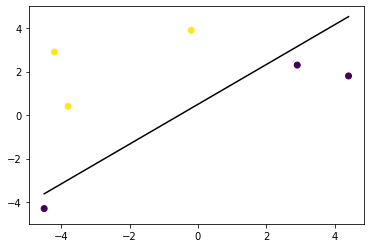

In [7]:
ploter(X, Y, p)

In [8]:
X_new = np.random.uniform(-5, 5, (3, 2))
tags = p.predict(X_new)

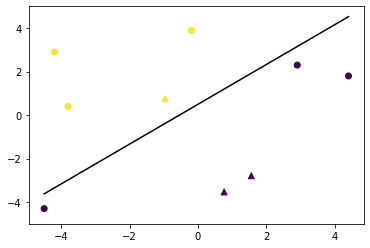

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X[:,0], X[:,1], marker = 'o', c=Y)
plt.scatter(X_new[:,0], X_new[:,1], marker = '^', c=tags)

x_1 = np.amin(X[:,0])
x_2 = np.amax(X[:,0])

x1_1 = (-p.weights[0] * x_1 - p.b) / p.weights[1]
x1_2 = (-p.weights[0] * x_2 - p.b) / p.weights[1]

ax.plot([x_1, x_2],[x1_1, x1_2],'k')

ax.set_ylim([-5, 5])
plt.show()

# Классификация линейно неразделимых классов (одну точку добавили так, чтобы множество стало линейно неразделимым)

In [10]:
X_2 = np.array([[-3.8, 0.4],[-0.2, 3.9], [2.9, 2.3], [-4.5, -4.3], [-4.2, 2.9], [4.4, 1.8], [-2, 3]])
Y_2 = np.array([1, 1, 0, 0, 1, 0, 0])

In [11]:
p2 = Perseptron(n_iter = 50)
p2.fit(X_2, Y_2.reshape((len(Y_2)), -1))

start weights  [[0.48173965]
 [0.49205521]]
start biase  [3.5093068]
---------------
epoch 0
weights  [[-4.51826035]
 [ 0.59205521]]
biase  [0.5093068]
mae 0.2857142857142857
---------------
---------------
epoch 1
weights  [[-2.41826035]
 [ 0.09205521]]
biase  [-2.4906932]
mae 0.42857142857142855
---------------
---------------
epoch 2
weights  [[-3.41826035]
 [ 1.19205521]]
biase  [-5.4906932]
mae 0.42857142857142855
---------------
---------------
epoch 3
weights  [[-1.61826035]
 [ 2.09205521]]
biase  [-5.4906932]
mae 0.14285714285714285
---------------
---------------
epoch 4
weights  [[ 0.38173965]
 [-0.90794479]]
biase  [-6.4906932]
mae 0.42857142857142855
---------------
---------------
epoch 5
weights  [[-1.61826035]
 [ 0.39205521]]
biase  [-5.4906932]
mae 0.2857142857142857
---------------
---------------
epoch 6
weights  [[-2.61826035]
 [ 1.49205521]]
biase  [-8.4906932]
mae 0.2857142857142857
---------------
---------------
epoch 7
weights  [[-0.81826035]
 [ 2.39205521]]
bia

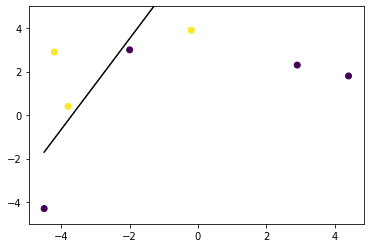

In [12]:
ploter(X_2, Y_2, p2)

# Классификация по 4 классам 


In [13]:
X_3 = np.array([[-0.6, 4.0], [-4.7, 0.3], [2.1, -3.3], [-1.7, -3.2], [-1.8, -1], [0.4, -4.6], [0.5, -2.3], [-2.6, -2.6]])
Y_3 = np.array([[1, 1], [1, 1], [0, 0], [0, 0], [0, 1], [0, 0], [0, 0], [0, 0]])
Y_rew = np.array([3, 3, 0, 0, 1, 0, 0, 0])

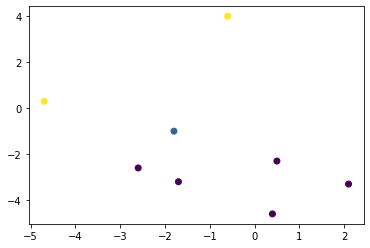

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_3[:,0], X_3[:,1], marker = 'o', c = Y_rew)
plt.show()

In [15]:
p_4 = Perseptron(n_iter = 50) 
p_4.fit(X_3, Y_3)

start weights  [[0.85322658 0.61746414]
 [0.0261027  0.72475743]]
start biase  [-0.4761455   0.86524978]
---------------
epoch 0
weights  [[-0.94677342 -1.18253586]
 [ 3.2261027   3.92475743]]
biase  [-0.4761455  -0.13475022]
mae 0.0625
---------------
---------------
epoch 1
weights  [[-0.94677342 -1.18253586]
 [ 2.2261027   2.92475743]]
biase  [-0.4761455   0.86524978]
mae 0.0
---------------
---------------
epoch 2
weights  [[-0.94677342 -1.18253586]
 [ 2.2261027   2.92475743]]
biase  [-0.4761455   0.86524978]
mae 0.0
---------------
---------------
epoch 3
weights  [[-0.94677342 -1.18253586]
 [ 2.2261027   2.92475743]]
biase  [-0.4761455   0.86524978]
mae 0.0
---------------
---------------
epoch 4
weights  [[-0.94677342 -1.18253586]
 [ 2.2261027   2.92475743]]
biase  [-0.4761455   0.86524978]
mae 0.0
---------------
---------------
epoch 5
weights  [[-0.94677342 -1.18253586]
 [ 2.2261027   2.92475743]]
biase  [-0.4761455   0.86524978]
mae 0.0
---------------
---------------
epoch 

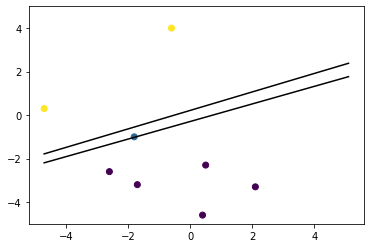

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_3[:,0], X_3[:,1], marker = 'o', c=Y_rew)

x_1 = np.amin(X_3[:,0])
x_2 = np.amax(X_3[:,0]) + 3 

x1_1 = (-p_4.weights[0,0] * x_1 - p_4.b[0]) / p_4.weights[1,0]
x1_2 = (-p_4.weights[0,0] * x_2 - p_4.b[0]) / p_4.weights[1,0]

x2_1 = (-p_4.weights[0,1] * x_1 - p_4.b[1]) / p_4.weights[1,1]
x2_2 = (-p_4.weights[0,1] * x_2 - p_4.b[1]) / p_4.weights[1,1]

ax.plot([x_1, x_2],[x1_1, x1_2],'k')
ax.plot([x_1, x_2],[x2_1, x2_2],'k')

ax.set_ylim([-5, 5])
plt.show()

# Добавление пяти точек

In [17]:
X_3_new =  np.random.uniform(-5, 5, (5, 2))

tags = p_4.predict(X_3_new)
rew_tags = []
for i in tags:
    print(i)
    if i[0] == 0 and i[1] == 0:
        rew_tags.append(0)
    elif i[0] == 0 and i[1] == 1:
        rew_tags.append(1)
    elif i[0] == 1 and i[1] == 0:
        rew_tags.append(2)
    elif i[0] == 1 and i[1] == 1:
        rew_tags.append(3)
        
Y_r = np.array(rew_tags)

[0 0]
[1 1]
[1 1]
[1 1]
[1 1]


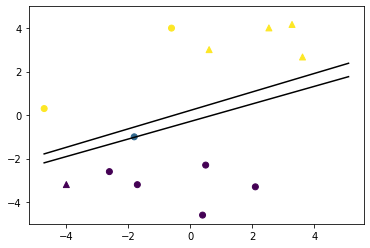

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_3[:,0], X_3[:,1], marker = 'o', c=Y_rew)
plt.scatter(X_3_new[:,0], X_3_new[:,1], marker = '^', c=Y_r)

x_1 = np.amin(X_3[:,0])
x_2 = np.amax(X_3[:,0]) + 3

x1_1 = (-p_4.weights[0,0] * x_1 - p_4.b[0]) / p_4.weights[1,0]
x1_2 = (-p_4.weights[0,0] * x_2 - p_4.b[0]) / p_4.weights[1,0]

x2_1 = (-p_4.weights[0,1] * x_1 - p_4.b[1]) / p_4.weights[1,1]
x2_2 = (-p_4.weights[0,1] * x_2 - p_4.b[1]) / p_4.weights[1,1]

ax.plot([x_1, x_2],[x1_1, x1_2],'k')
ax.plot([x_1, x_2],[x2_1, x2_2],'k')

ax.set_ylim([-5, 5])
plt.show()